In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical


In [2]:
# Load dataset
df = pd.read_csv("keypoints.csv")

# Remove all-zero frames (blank detections)
df = df[~(df.iloc[:, :-1] == 0).all(axis=1)]

# Split features and labels
X = df.drop("label", axis=1).values
y = df["label"].values

In [3]:
# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Normalize features
X = X / np.max(X)


In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_categorical.shape[1], activation='softmax')
])


c:\Users\Administrator\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=16)


Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0362 - loss: 3.6884 - val_accuracy: 0.0513 - val_loss: 3.6566
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.0646 - loss: 3.6630 - val_accuracy: 0.0513 - val_loss: 3.6448
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0749 - loss: 3.6378 - val_accuracy: 0.0916 - val_loss: 3.6348
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0672 - loss: 3.6439 - val_accuracy: 0.0952 - val_loss: 3.6129
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0937 - loss: 3.5953 - val_accuracy: 0.0952 - val_loss: 3.4496
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1018 - loss: 3.4911 - val_accuracy: 0.0952 - val_loss: 3.3694
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0937 - loss: 3.4056 - val_accuracy: 0.1429 - val_loss: 3.2992
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.0950 - loss: 3.3406 - val_accuracy: 0.1136 - val_

In [6]:
# Save model and encoders
model.save("sign_model.h5")
import joblib
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [8]:
# Evaluate
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


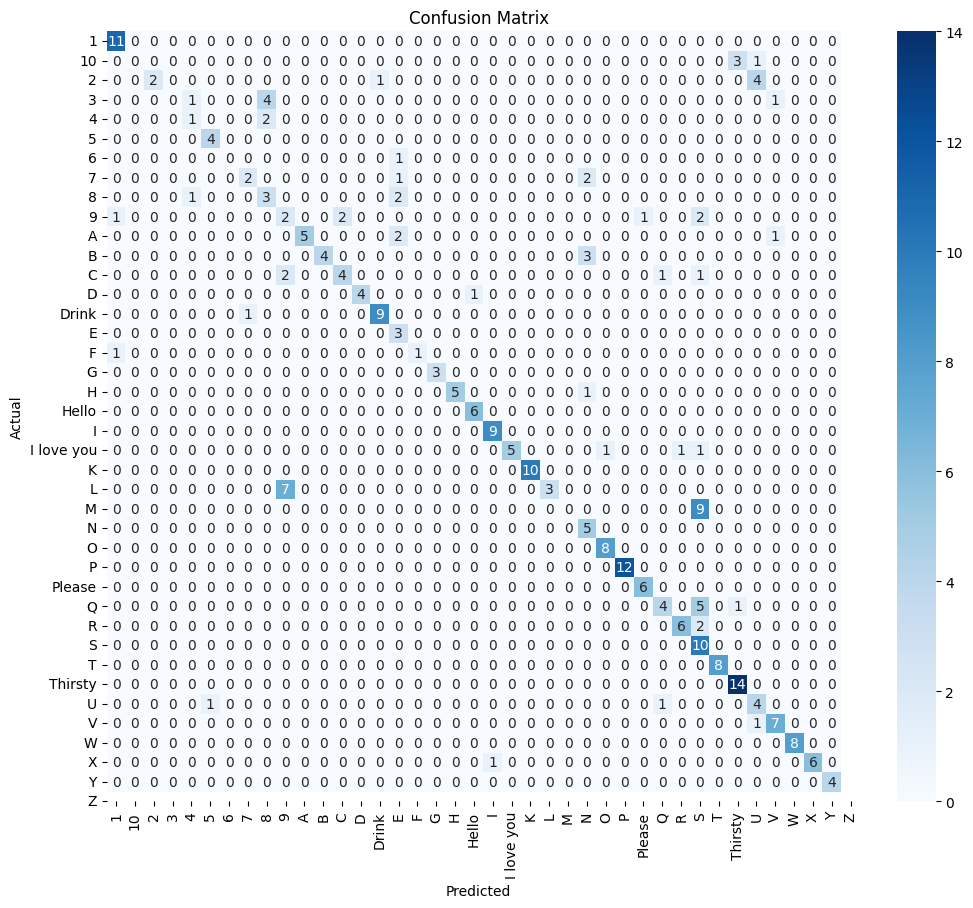

In [9]:
# Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_true_classes, y_pred_classes), annot=True, fmt='d', 
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

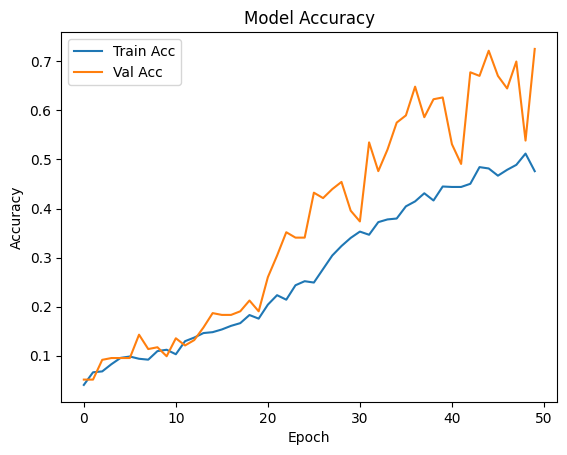

In [11]:
# Accuracy / Loss plot
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


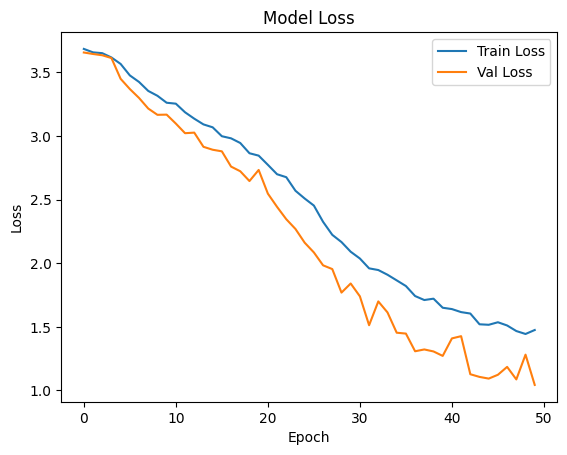

In [12]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
